In [78]:
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torch import tensor
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = tensor(x_train/255.0)  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = tensor(x_test/255.0)  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

In [79]:
size = 4
size2 = size**2

In [110]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784,128)
        self.layer2 = nn.Linear(128,128)
        self.encoder = nn.Linear(128,size2)
        
        self.layer3 = nn.Linear(size2,128)
        self.layer4 = nn.Linear(128,128)
        self.decoder = nn.Linear(128,784)
        
    def encode(self,x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.encoder(x))
        return x
    
    def forward(self,x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.encoder(x))
        
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.decoder(x))
        
        return x
    def decode(self,x):
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.decoder(x))
        return x

In [111]:
net = NN()
x_train_batch = x_train.view(-1,10,28,28)
x_train_batch.shape

torch.Size([6000, 10, 28, 28])

In [112]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)
epochs = 5
for e in tqdm(range(epochs)):
    for batch in x_train_batch:
        net.zero_grad()
        output = net.forward(batch.view(-1,784).float())
        loss = nn.MSELoss()
        l = loss(output,batch.view(-1,784).float())
        l.backward()
        optimizer.step()
    print(l)

 20%|████████████████▊                                                                   | 1/5 [00:36<02:27, 36.94s/it]

tensor(0.0259, grad_fn=<MseLossBackward>)


 40%|█████████████████████████████████▌                                                  | 2/5 [01:15<01:52, 37.43s/it]

tensor(0.0241, grad_fn=<MseLossBackward>)


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:53<01:15, 37.75s/it]

tensor(0.0238, grad_fn=<MseLossBackward>)


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:33<00:38, 38.17s/it]

tensor(0.0237, grad_fn=<MseLossBackward>)


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:13<00:00, 38.61s/it]

tensor(0.0234, grad_fn=<MseLossBackward>)


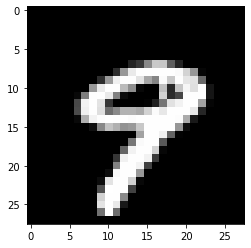

In [125]:
img = x_test[9]
plt.imshow(img,cmap='gray')

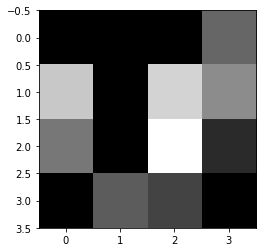

In [126]:
encoded_img = net.encode(img.view(-1,784).float())
encoded_img = encoded_img.view(size,size)
encoded_img = encoded_img.detach()
plt.imshow(encoded_img,cmap='gray')

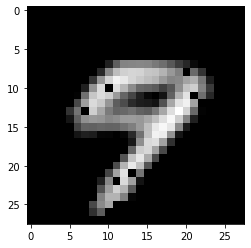

In [127]:
decoded_img = net.decode(encoded_img.view(1,size2).float())
decoded_img = decoded_img.view(28,28).detach()
plt.imshow(decoded_img,cmap='gray')